In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from scipy import special
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.special import gammaln
from scipy.special import gamma

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
def bkg_function_Xe(Enr):
    #Background function for Xenon, in events/kg/day (converted to natural units)
    return 1e-5*Enr**.8*np.exp(-0.02*Enr)*(KgDay**-1)

In [4]:
def bkg_function_Ge(Enr):
    #Background function for Germanium, in events/kg/day (converted to natural units)
    return 4e-6*Enr**.5*np.exp(-0.01*Enr)*(KgDay**-1)

In [5]:
# Importing units from earlier jupyter notebook
GeV = 1e6  # GeV = 1e6 * keV = 1e6 when keV = 1
eV = 1e-9*GeV
keV = 1e-6*GeV
MeV = 1e-3*GeV

Kmps = 3.3e-6   # km/s
Kg = 5.6e35*eV  # kg
Sec = 1/(6.58e-16*eV)  #seconds
amu = 1.66e-27*Kg   # atomic mass unit in kg
Centimeter = 5.07e13/GeV  # cm

KgDay = Kg*Sec*86400   
KgYear = 365.25*KgDay

In [7]:
fileName1 = "/content/drive/MyDrive/DirectDetection-Inelastic/Data/events_Ge.txt"
data_Ge = np.loadtxt(fileName1,dtype=float)

fileName2 = "/content/drive/MyDrive/DirectDetection-Inelastic/Data/events_Xe.txt"
data_Xe = np.loadtxt(fileName2,dtype=float)

In [8]:
x = np.linspace(0,200,8)

In [9]:
z = []
z.append(quad(lambda x: 100000*KgDay*bkg_function_Xe(x), 5*keV, 25*keV)[0])
z.append(quad(lambda x: 100000*KgDay*bkg_function_Xe(x), 25*keV, 50*keV)[0])
z.append(quad(lambda x: 100000*KgDay*bkg_function_Xe(x), 50*keV, 75*keV)[0])
z.append(quad(lambda x: 100000*KgDay*bkg_function_Xe(x), 75*keV, 100*keV)[0])
z.append(quad(lambda x: 100000*KgDay*bkg_function_Xe(x), 100*keV, 125*keV)[0])
z.append(quad(lambda x: 100000*KgDay*bkg_function_Xe(x), 125*keV, 150*keV)[0])
z.append(quad(lambda x: 100000*KgDay*bkg_function_Xe(x), 150*keV, 175*keV)[0])
z.append(quad(lambda x: 100000*KgDay*bkg_function_Xe(x), 175*keV, 200*keV)[0])

[123.83800921688422, 211.2824619508899, 194.98596167591103, 155.4760843583463, 115.57182003693643, 82.42519705319586, 57.19877282092812, 38.928923455056584]


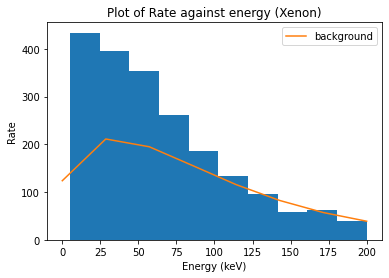

In [126]:
plt.hist(data_Xe)
plt.plot(x,z, label = 'background')
plt.title("Plot of Rate against energy (Xenon)")
plt.xlabel("Energy (keV)")
plt.ylabel("Rate")
plt.legend()

In [12]:
y = np.linspace(0,200,8)
u = []
u.append(quad(lambda x: 10000*KgDay*bkg_function_Ge(x), 5*keV, 25*keV)[0])
u.append(quad(lambda x: 10000*KgDay*bkg_function_Ge(x), 25*keV, 50*keV)[0])
u.append(quad(lambda x: 10000*KgDay*bkg_function_Ge(x), 50*keV, 75*keV)[0])
u.append(quad(lambda x: 10000*KgDay*bkg_function_Ge(x), 75*keV, 100*keV)[0])
u.append(quad(lambda x: 10000*KgDay*bkg_function_Ge(x), 100*keV, 125*keV)[0])
u.append(quad(lambda x: 10000*KgDay*bkg_function_Ge(x), 125*keV, 150*keV)[0])
u.append(quad(lambda x: 10000*KgDay*bkg_function_Ge(x), 150*keV, 175*keV)[0])
u.append(quad(lambda x: 10000*KgDay*bkg_function_Ge(x), 175*keV, 200*keV)[0])

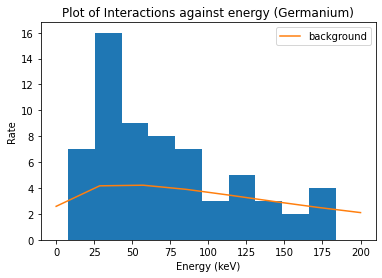

In [127]:
plt.hist(data_Ge)
plt.plot(y,u, label = 'background')
plt.title("Plot of Interactions against energy (Germanium)")
plt.xlabel("Energy (keV)")
plt.ylabel("Rate")
plt.legend()

0.002475673998347095
1.5643222361847508e-26
1.529957691197121e-29


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


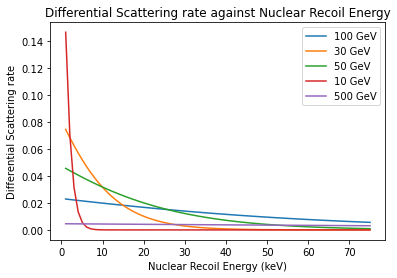

In [110]:
d = 0
%matplotlib inline
# following functions all taken from direct detection in class notebook
def red_mass(m1, m2):
  mu_n = (m1*m2)/(m1+m2)
  return mu_n

# redefining the v_min function
def v_min(E, m_dm, A, d):
  v_min = (1/np.sqrt(2*A*amu*E))*np.abs((E*(m_dm + A*amu)/m_dm + d))
  return v_min


print(v_min(10*keV,100*GeV,131,100*keV))

v_obs = 250*Kmps
v_0 = 220*Kmps
def get_integral(v_min):
  x = np.divide(v_min,v_0)
  y = v_obs/v_0
  integral = (1/(2*v_obs))*(special.erf(x+y)-special.erf(x-y))
  return integral

m_p = 1*amu

def sigma_n(sigma_p, A, m_dm):
  mu_p = red_mass(m_p,m_dm)
  mu_n = red_mass(A*amu, m_dm)
  sigma_n = ((mu_n**2)/(mu_p**2))*(A**2)*(sigma_p)
  return sigma_n

p_dm = 0.4*GeV*Centimeter**(-3)

def dRdE1(m_dm, sigma_p, A, d, E):
  vmin = v_min(E, m_dm, A, d)
  c = (1/(2*m_dm*red_mass(A*amu,m_dm)**2))
  dRdE = c*(sigma_n(sigma_p, A, m_dm)*p_dm*get_integral(vmin))
  return dRdE

sigmap = 10**-45*Centimeter**(2)
A = 131.293
Enr = np.linspace(0,75,75)

print(sigma_n(sigmap, m_dm, A))

drde_v = dRdE1(100*GeV,sigmap,A, d, Enr)*KgYear
drde_1 = dRdE1(30*GeV,sigmap,A, d, Enr)*KgYear
drde_2 = dRdE1(50*GeV,sigmap,A, d, Enr)*KgYear
drde_3 = dRdE1(10*GeV,sigmap,A, d, Enr)*KgYear
drde_4 = dRdE1(500*GeV,sigmap,A, d, Enr)*KgYear

plt.plot(Enr, drde_v, label = '100 GeV')
plt.plot(Enr, drde_1, label = '30 GeV')
plt.plot(Enr, drde_2, label = '50 GeV')
plt.plot(Enr, drde_3, label = '10 GeV')
plt.plot(Enr, drde_4, label = '500 GeV')
plt.legend()
plt.title("Differential Scattering rate against Nuclear Recoil Energy")
plt.xlabel("Nuclear Recoil Energy (keV)")
plt.ylabel("Differential Scattering rate")

print(dRdE1(100*GeV, 50, 131, 1, 5))

In [98]:
sigma_p = 10**-45*Centimeter**(2)

def model_Ge(m_dm, coeff, d):
  d *= keV
  model_Ge = []
  model_Ge.append(quad(lambda x: 10000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 72, d, x), 5*keV, 25*keV)[0])
  model_Ge.append(quad(lambda x: 10000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 72, d, x), 25*keV, 50*keV)[0])
  model_Ge.append(quad(lambda x: 10000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 72, d, x), 50*keV, 75*keV)[0])
  model_Ge.append(quad(lambda x: 10000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 72, d, x), 75*keV, 100*keV)[0])
  model_Ge.append(quad(lambda x: 10000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 72, d, x), 100*keV, 125*keV)[0])
  model_Ge.append(quad(lambda x: 10000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 72, d, x), 125*keV, 150*keV)[0])
  model_Ge.append(quad(lambda x: 10000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 72, d, x), 150*keV, 175*keV)[0])
  model_Ge.append(quad(lambda x: 10000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 72, d, x), 175*keV, 200*keV)[0])
  total_Ge = np.zeros(len(model_Ge))
  model = np.add(model_Ge, u)

  return model

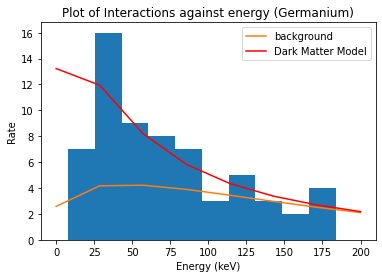

In [129]:
coeff = 3 #Dark matter cross section w a proton
m_dm = 78
d = 0.9

total_Ge = model_Ge(m_dm, coeff, d)

# Plot for Germanium
plt.hist(data_Ge)
plt.plot(x,u, label = 'background') # background
plt.plot(x, total_Ge, 'red', label = 'Dark Matter Model') # background + Dark Matter
plt.title("Plot of Interactions against energy (Germanium)")
plt.xlabel("Energy (keV)")
plt.ylabel("Rate")
plt.legend()

In [81]:
def model_Xe(m_dm, coeff, d):
  model_Xe = []
  d *= keV
  model_Xe.append(quad(lambda x: 100000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 131.29, d, x), 5*keV, 25*keV)[0])
  model_Xe.append(quad(lambda x: 100000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 131.29, d, x), 25*keV, 50*keV)[0])
  model_Xe.append(quad(lambda x: 100000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 131.29, d, x), 50*keV, 75*keV)[0])
  model_Xe.append(quad(lambda x: 100000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 131.29, d, x), 75*keV, 100*keV)[0])
  model_Xe.append(quad(lambda x: 100000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 131.29, d, x), 100*keV, 125*keV)[0])
  model_Xe.append(quad(lambda x: 100000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 131.29, d, x), 125*keV, 150*keV)[0])
  model_Xe.append(quad(lambda x: 100000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 131.29, d, x), 150*keV, 175*keV)[0])
  model_Xe.append(quad(lambda x: 100000*KgDay*dRdE1(m_dm * GeV, coeff*sigma_p, 131.29, d, x), 175*keV, 200*keV)[0])
  model = np.add(model_Xe, z)
  return model

[473.84319488 460.27079714 317.92391214 212.86276294 141.2588428
  93.55072107  61.89032664  40.86372125]


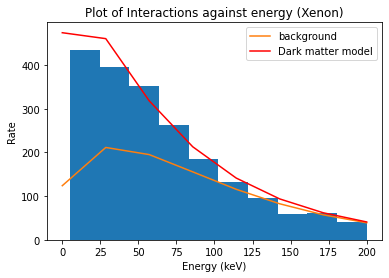

In [130]:
sigma_p = 10**-45*Centimeter**(2)
coeff = 3
m_dm = 78
d = 1

total_Xe = model_Xe(m_dm, coeff, d)
print(total_Xe)
# Plot for Xenon
plt.hist(data_Xe)
plt.plot(x,z, label = 'background') # background
plt.plot(x, total_Xe, 'red', label = 'Dark matter model') # background + Dark Matter
plt.title("Plot of Interactions against energy (Xenon)")
plt.xlabel("Energy (keV)")
plt.ylabel("Rate")
plt.legend()

In [49]:
!pip install emcee
!pip install corner

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
from scipy.special import gammaln

%matplotlib inline

In [90]:
data1 = np.histogram(data_Xe, bins = 8, range = (0, 200))[0]

In [91]:
def lnlike(theta):
    """ Log-likelihood function
    """
    
    #read in the unknown parameters from the theta array
    a, b, c = theta
    
    #make your model prediction, for the values of a,b that were read in 
    model = model_Xe(a, b, c)
    
    #define the Poisson log-likelihood
    loglikelihood_poisson = np.sum(data1*np.log(model)-model-gammaln(data1+1))
    
    return loglikelihood_poisson

In [92]:
def lnprior(theta):
    """ Prior on our parameters
    """
    a, b, c = theta
    
    amin = 1
    amax = 1000

    bmin = 1
    bmax = 100

    cmin = 0
    cmax = 200
    
    if amin < a < amax and bmin < b < bmax and cmin < c < cmax:
        return 0.0
    return -np.inf

def lnprob(theta):
    """ Likelihood, combined with prior
    """
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta)

In [93]:
#Specify the number of free parameters, in this case it is 2 (ie, a and b)
ndim = 3

#Specify the number of walkers and steps
nwalkers, nsteps = 100, 1000  

#Specify the initial position for each walker
#Provide guesses for the values of a and b
a_initial = 60
b_initial = 3
c_initial = 1
initial_pos = [[a_initial, b_initial, c_initial] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [94]:
# Initialize emcee samples
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

# Run MCMC posterior scan
sampler.run_mcmc(initial_pos, nsteps)

State([[113.82773978   3.7189878    1.20400251]
 [103.01077091   6.50564632  27.93684466]
 [106.67348756   5.81826587  24.52583347]
 [104.73092606   5.4402893   20.80316689]
 [104.07655451   5.24510009  19.78852836]
 [ 98.80877499   5.43762949  23.78495817]
 [106.75880581   4.31889777  14.83248968]
 [ 91.54934477   7.31482464  28.90121433]
 [ 96.9765626    5.58727187  23.72588114]
 [110.92953731   4.5094279   13.16005184]
 [ 99.08536453   6.49854271  26.23285391]
 [101.05124891   4.35969521  10.09631259]
 [102.92355333   5.89784644  25.67932932]
 [ 93.0925413    7.91914925  35.27023344]
 [103.15527113   8.44766933  36.43623516]
 [ 95.55184914   6.65152987  26.00231957]
 [109.16535845   4.5324573   14.84483405]
 [105.39571022   7.67488991  32.77650466]
 [109.27664675   4.73390179  15.33357649]
 [102.03288033   7.20916808  32.02445049]
 [114.82413781   3.54271674   2.20694086]
 [104.43416248   3.80559492   2.22555284]
 [100.40434773   6.06890508  25.94241991]
 [102.80143994   5.76117745 

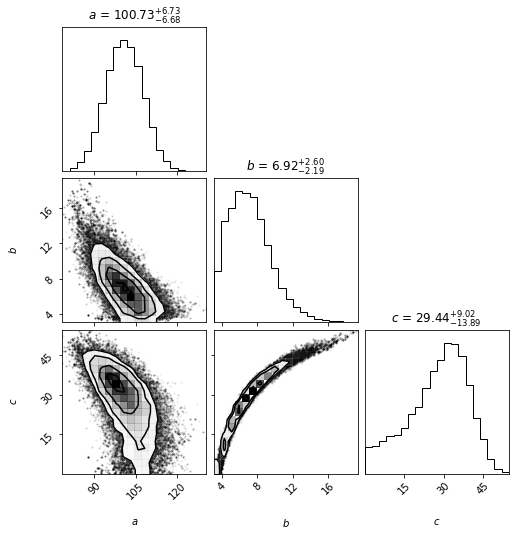

In [95]:
# Get and plot posterior samples
samples = sampler.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$a$", "$b$", "$c$"], show_titles=True)

In [118]:
data2 = np.histogram(data_Ge, bins = 8, range = (0, 200))[0]

In [119]:
def lnlike(theta):
    """ Log-likelihood function
    """
    
    #read in the unknown parameters from the theta array
    a, b, c = theta
    
    #make your model prediction, for the values of a,b that were read in 
    model = model_Ge(a, b, c)
    
    #define the Poisson log-likelihood
    loglikelihood_poisson = np.sum(data2*np.log(model)-model-gammaln(data2+1))
    
    return loglikelihood_poisson

In [120]:
def lnprior2(theta):
    """ Prior on our parameters
    """
    a, b, c = theta
    
    amin = 1
    amax = 1000

    bmin = 1
    bmax = 100

    cmin = 0
    cmax = 200
    
    if amin < a < amax and bmin < b < bmax and cmin < c < cmax:
        return 0.0
    return -np.inf

def lnprob(theta):
    """ Likelihood, combined with prior
    """
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta)

In [121]:
#Specify the number of free parameters, in this case it is 2 (ie, a and b)
ndim = 3

#Specify the number of walkers and steps
nwalkers, nsteps = 100, 1000  

#Specify the initial position for each walker
#Provide guesses for the values of a and b
a_initial = 60
b_initial = 3
c_initial = 1
initial_pos = [[a_initial, b_initial, c_initial] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [122]:
# Initialize emcee samples
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

# Run MCMC posterior scan
sampler.run_mcmc(initial_pos, nsteps)

State([[ 86.28561468  59.36588486  62.89381821]
 [ 83.32999232  92.31651339  62.63745935]
 [143.8018381   20.94055856  46.98521248]
 [113.53357676  97.33901767  67.67402366]
 [ 93.80182693  71.42527755  65.28445629]
 [116.4003157   41.38493054  54.27490859]
 [ 81.34568817  90.95445678  64.03696532]
 [ 89.3954512   66.04469015  59.56909764]
 [661.21835537  19.98302258  22.26890049]
 [187.97047168  36.24371352  58.97412579]
 [712.83109914  38.75327461  27.58783054]
 [120.38678848  50.29586046  56.25801528]
 [140.68722205  59.11225459  66.66065419]
 [998.92805477  31.78703974  19.36943546]
 [ 71.22881743  21.34094551  38.44902163]
 [351.0508271   28.26102184  41.13018708]
 [904.31146171  49.25616973  45.68425757]
 [766.29765407  24.74540583  19.5802094 ]
 [186.20480576  32.46389504  51.31126806]
 [672.53056846  19.58927396  33.31860374]
 [ 63.77416597  37.795782    47.70176578]
 [121.22148188  55.98850745  60.33903144]
 [591.29324025  40.79570538  41.77382356]
 [110.61662537  68.64893724 

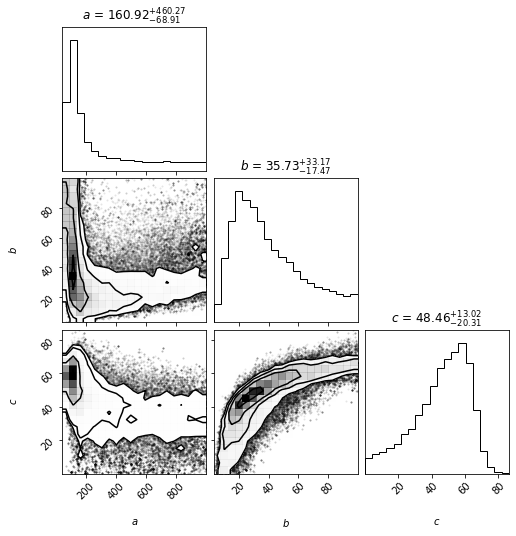

In [123]:
# Get and plot posterior samples
samples = sampler.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$a$", "$b$", "$c$"], show_titles=True)